<a href="https://colab.research.google.com/github/Wnoman/Notebook/blob/main/Image_Classification_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/Github/

[Errno 2] No such file or directory: '/content/drive/MyDrive/Github/'
/content


In [ ]:
pip install -q tensorflow tensorflow-datasets


In [ ]:
## import Necesssary libraries

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
## Download and explore the dataset

import pathlib
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

228827136/228813984 [==============================] - 2s 0us/step


In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

3670


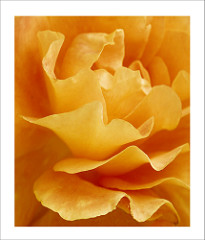

In [ ]:
#Roses

roses = list(data_dir.glob('roses/*'))
#PIL.Image.open(str(roses[0]))
PIL.Image.open(str(roses[1]))

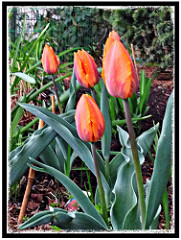

In [ ]:
#Tulips

tulips = list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[0]))
#PIL.Image.open(str(tulips[1]))


Dataset

In [ ]:
#parameters

batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2, 
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size=batch_size)


Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2, # 20% validation
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [ ]:
class_names = train_ds.class_names
print(class_names)


['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


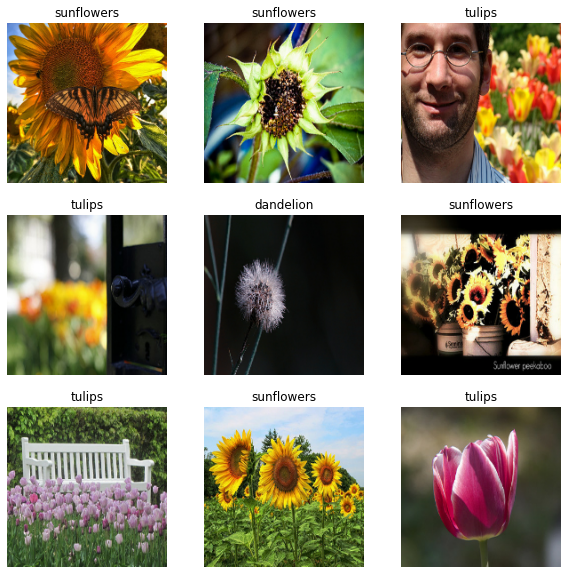

In [ ]:
#First 9 images form the trianing

import matplotlib.pyplot as plt # plt is an alias

plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [ ]:
#configure the data
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#standardize the data

normalization_layer = layers.Rescaling(1./255)

In [ ]:
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image)) 

0.0 1.0


Create model


In [ ]:
num_classes = 5

model = Sequential([
                    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
                    layers.Conv2D(16, 3, padding = 'same' , activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(32, 3,  padding = 'same' , activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Conv2D(64, 3,  padding = 'same' , activation = 'relu'),
                    layers.MaxPooling2D(),
                    layers.Flatten(),
                    layers.Dense(128, activation='relu'),
                    layers.Dense(num_classes)
])

In [ ]:
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 45, 45, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 22, 22, 64)        0

Train


In [ ]:
epochs = 10
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs
)

Epoch 1/10
92/92 [==============================] - 92s 993ms/step - loss: 1.3041 - accuracy: 0.4533 - val_loss: 1.1111 - val_accuracy: 0.5300
Epoch 2/10
92/92 [==============================] - 90s 977ms/step - loss: 0.9464 - accuracy: 0.6294 - val_loss: 0.9588 - val_accuracy: 0.6199
Epoch 3/10
92/92 [==============================] - 90s 976ms/step - loss: 0.7454 - accuracy: 0.7183 - val_loss: 0.9094 - val_accuracy: 0.6621
Epoch 4/10
92/92 [==============================] - 90s 979ms/step - loss: 0.5300 - accuracy: 0.8072 - val_loss: 1.0123 - val_accuracy: 0.6294
Epoch 5/10
92/92 [==============================] - 90s 978ms/step - loss: 0.3390 - accuracy: 0.8811 - val_loss: 1.2090 - val_accuracy: 0.6022
Epoch 6/10
92/92 [==============================] - 90s 977ms/step - loss: 0.1955 - accuracy: 0.9401 - val_loss: 1.3776 - val_accuracy: 0.6158
Epoch 7/10
92/92 [==============================] - 90s 979ms/step - loss: 0.1103 - accuracy: 0.9663 - val_loss: 1.6357 - val_accuracy: 0.6172

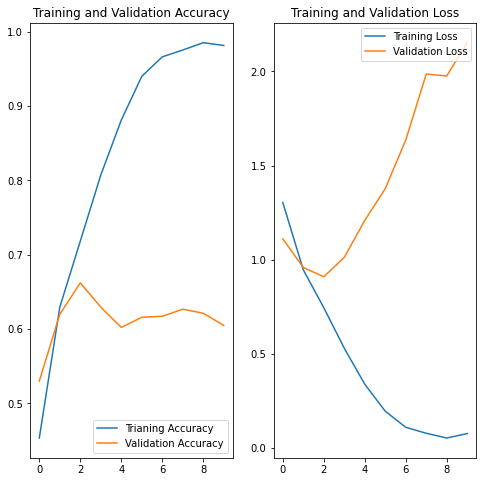

In [ ]:
#visualize

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Trianing Accuracy")
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Data augementation

a way to artifically expland the data size by modifying the images

In [ ]:
data_augmentation = keras.Sequential(
    [
     layers.RandomFlip("horizontal",
                       input_shape=(img_height,
                                    img_width,
                                    3)),
     layers.RandomRotation(0.1),
     layers.RandomZoom(0.1),
    ]
)

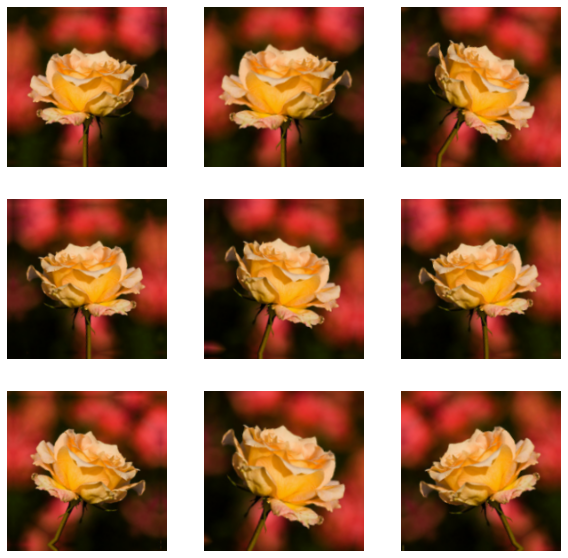

In [ ]:
#visualize

plt.figure(figsize=(10,10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augemented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(augemented_images[0].numpy().astype("uint8"))
    plt.axis("off")

Droput

other method instead of augmentation

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [ ]:
#compile
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 90, 90, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 45, 45, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 45, 45, 64)       

In [ ]:
epochs = 15
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/15
92/92 [==============================] - 104s 1s/step - loss: 1.3188 - accuracy: 0.4271 - val_loss: 1.1832 - val_accuracy: 0.4973
Epoch 2/15
92/92 [==============================] - 103s 1s/step - loss: 1.0601 - accuracy: 0.5685 - val_loss: 1.0601 - val_accuracy: 0.5790
Epoch 3/15
92/92 [==============================] - 103s 1s/step - loss: 0.9121 - accuracy: 0.6560 - val_loss: 0.9168 - val_accuracy: 0.6458
Epoch 4/15
92/92 [==============================] - 103s 1s/step - loss: 0.8406 - accuracy: 0.6747 - val_loss: 0.9131 - val_accuracy: 0.6676
Epoch 5/15
92/92 [==============================] - 103s 1s/step - loss: 0.8026 - accuracy: 0.6935 - val_loss: 0.9241 - val_accuracy: 0.6444
Epoch 6/15
92/92 [==============================] - 103s 1s/step - loss: 0.7341 - accuracy: 0.7193 - val_loss: 0.8615 - val_accuracy: 0.6798
Epoch 7/15
92/92 [==============================] - 103s 1s/step - loss: 0.7104 - accuracy: 0.7272 - val_loss: 0.7464 - val_accuracy: 0.7112
Epoch 8/15
92

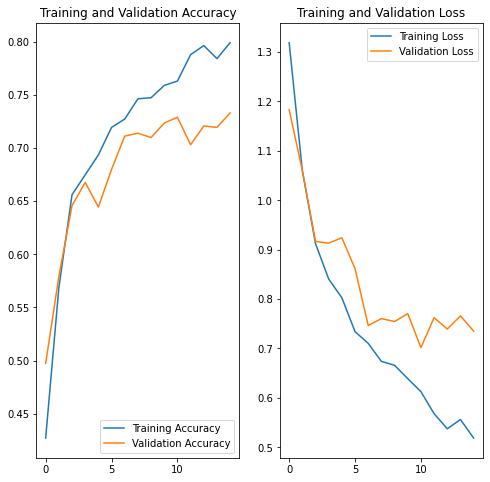

In [ ]:
#visualize

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(img_height, img_width)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

131072/117948 [=================================] - 0s 0us/step
This image most likely belongs to sunflowers with a 78.18 percent confidence.
